In [34]:
!pip install -q kagglehub seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import kagglehub
path = kagglehub.dataset_download("minahilfatima12328/lifestyle-and-sleep-patterns")
print("Carpeta del dataset:", path)
import os
print(os.listdir(path))
file_name = "Sleep_health_and_lifestyle_dataset.csv"  # ajústalo si es distinto
df = pd.read_csv(os.path.join(path, file_name))
df.head()


Using Colab cache for faster access to the 'lifestyle-and-sleep-patterns' dataset.
Carpeta del dataset: /kaggle/input/lifestyle-and-sleep-patterns
['Sleep_health_and_lifestyle_dataset.csv']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Exploración del conjunto de datos


In [36]:
print("Shape:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isna().sum())
df.describe(include='all')


Shape: (374, 13)

Tipos de datos:
 Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Valores nulos por columna:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


### El dataset tiene X filas y Y columnas. Las variables numéricas/categóricas son … Veo que la columna Z tiene cierta cantidad de valores nulos, lo que sugiere que …


In [37]:
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].str.split("/", expand=True)
    df["Systolic_BP"] = pd.to_numeric(bp_split[0], errors='coerce')
    df["Diastolic_BP"] = pd.to_numeric(bp_split[1], errors='coerce')
    df.drop(columns=["Blood Pressure"], inplace=True)


### Transformo la variable ‘Blood Pressure’ en dos variables para poder analizarlas numéricamente en lugar de como texto.


# Análisis univariante


In [38]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)


Numéricas: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']
Categóricas: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


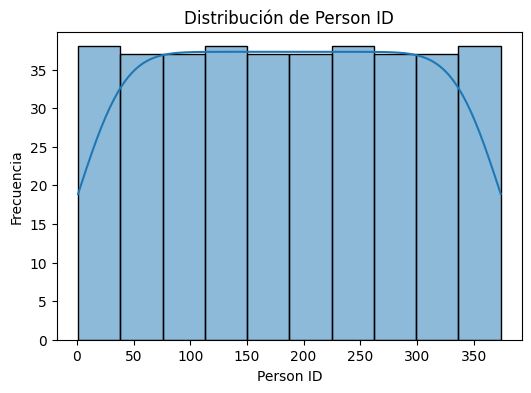

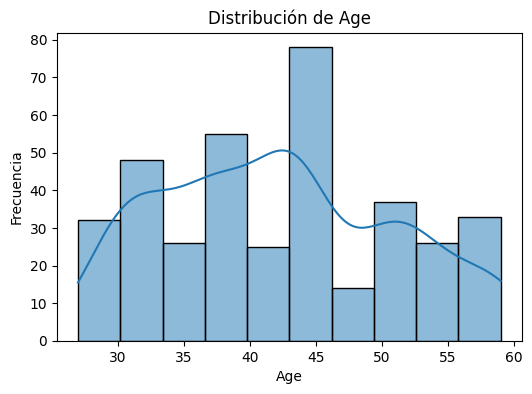

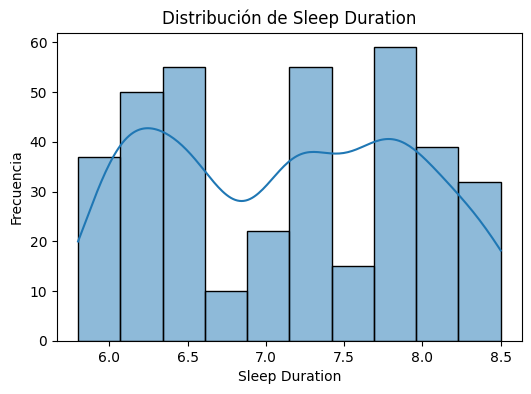

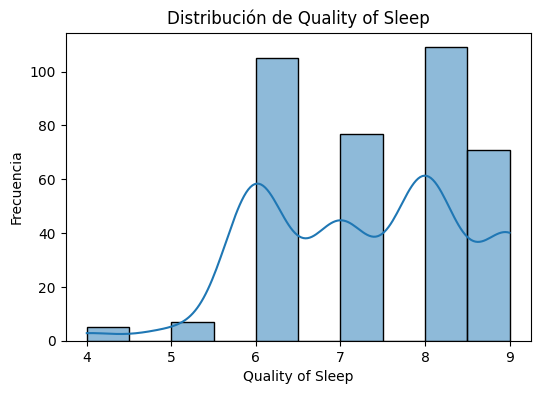

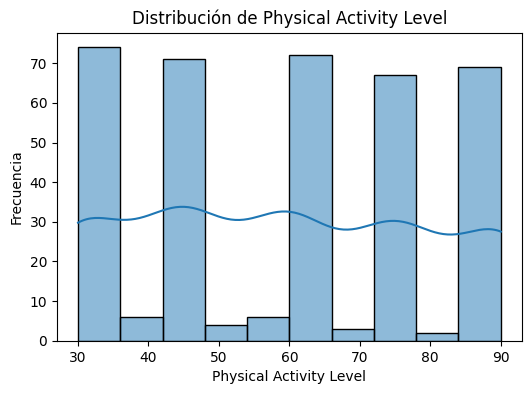

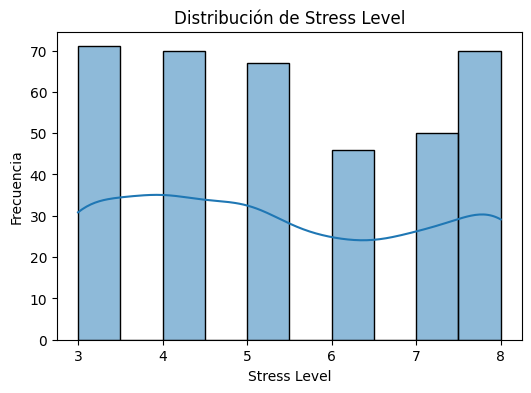

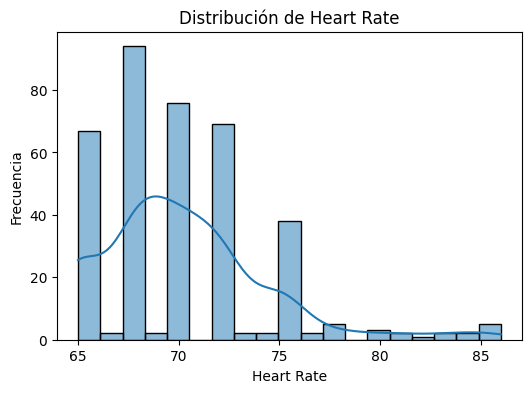

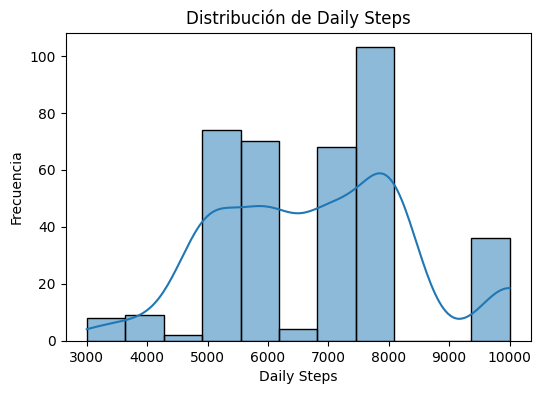

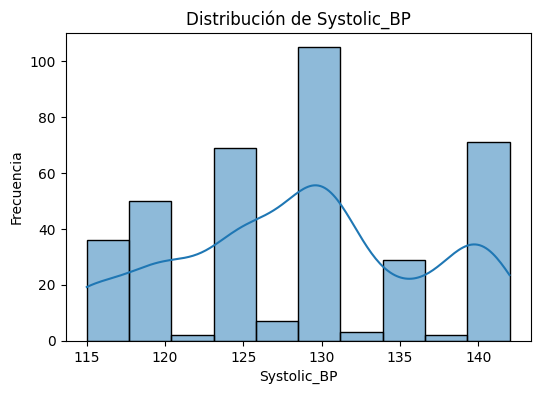

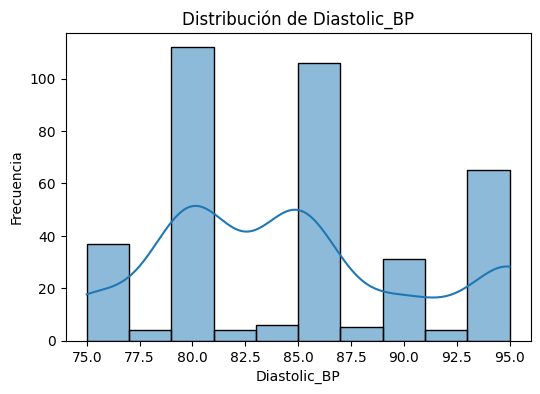

In [39]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


## En la variable ‘Sleep Duration’ observamos que la mayor parte de los participantes duermen entre X y Y horas, con un pequeño número que duerme muy poco (< Z horas). Esto podría indicar que …


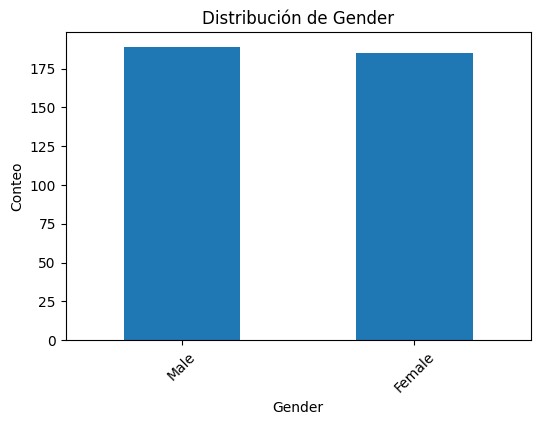

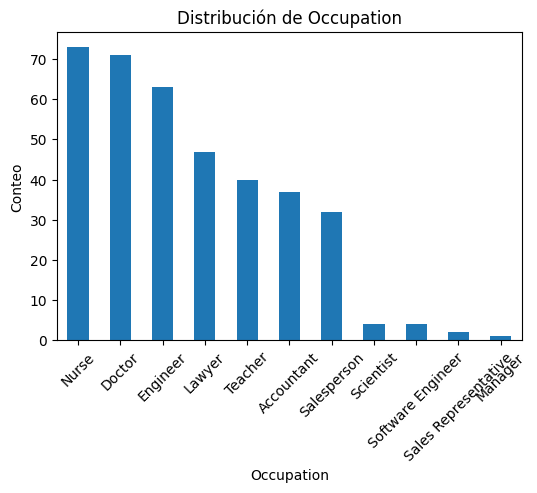

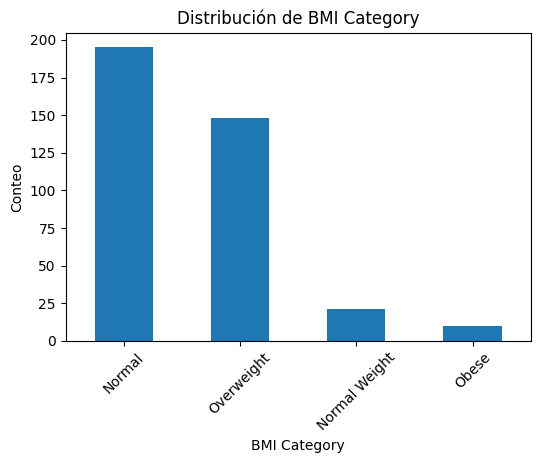

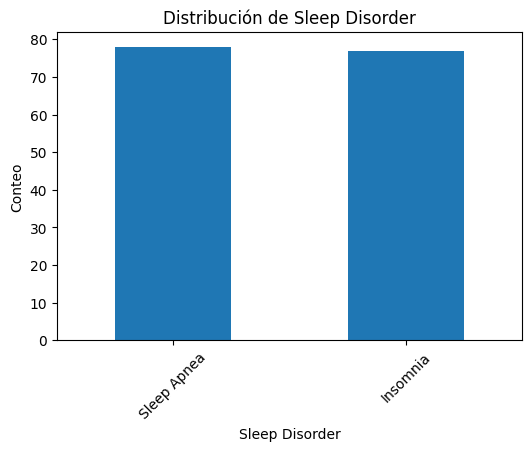

In [40]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.show()


### La categoría ‘Obese’ en BMI Category es la más frecuente (~XX %), lo que sugiere un predominio de …


# Filtrado de valores extremos


In [41]:
def iqr_filter(data, cols, k=1.5):
    df_f = data.copy()
    for col in cols:
        Q1 = df_f[col].quantile(0.25)
        Q3 = df_f[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df_f = df_f[(df_f[col] >= lower) & (df_f[col] <= upper)]
    return df_f

df_filtered = iqr_filter(df, num_cols, k=1.5)
print("Original:", df.shape)
print("Filtrado:", df_filtered.shape)
df = df_filtered.copy()


Original: (374, 14)
Filtrado: (359, 14)


### Aplico el método IQR para eliminar los extremos que pueden distorsionar el análisis y el modelo posterior, manteniendo la mayor parte del rango de datos relevantes.


## “Definición de la variable objetivo”. Explica la lógica de “ESTRES MODERADO” y “ESTRESADO”

In [42]:
def categorizar_estres(x):
    if 3 <= x <= 6:
        return "ESTRES MODERADO"
    elif x >= 7:
        return "ESTRESADO"
    else:
        return np.nan  # o "BAJO ESTRES"

df["Stress_Binary"] = df["Stress Level"].apply(categorizar_estres)
df = df[df["Stress_Binary"].isin(["ESTRES MODERADO","ESTRESADO"])]
df.drop(columns=["Stress Level"], inplace=True)
df["Stress_Binary"].value_counts(normalize=True)


,proportion
Stress_Binary,
ESTRES MODERADO,0.690808
ESTRESADO,0.309192


### Elimino los registros con valores por debajo de 3 si lo considero poco relevante, y transformo la variable de estrés en binaria para facilitar la futura clasificación. También elimino la variable original para evitar redundancia.


# Análisis bivariante


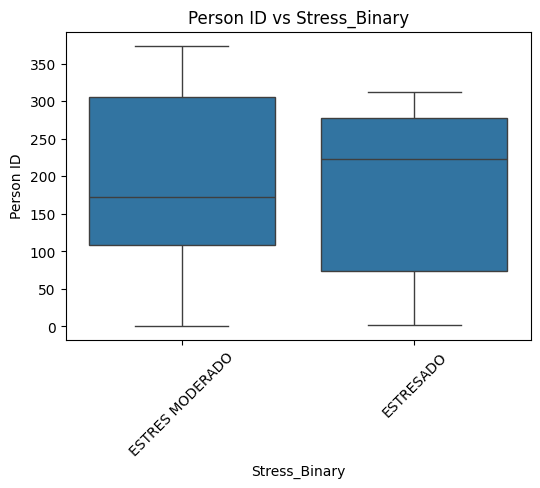

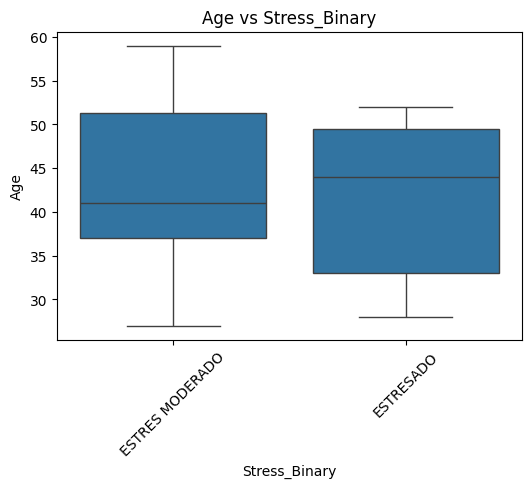

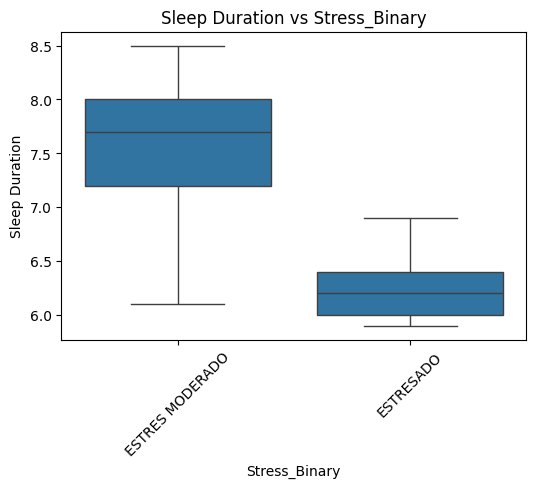

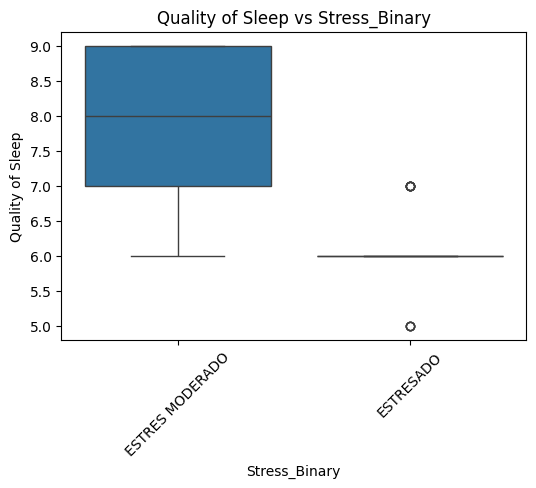

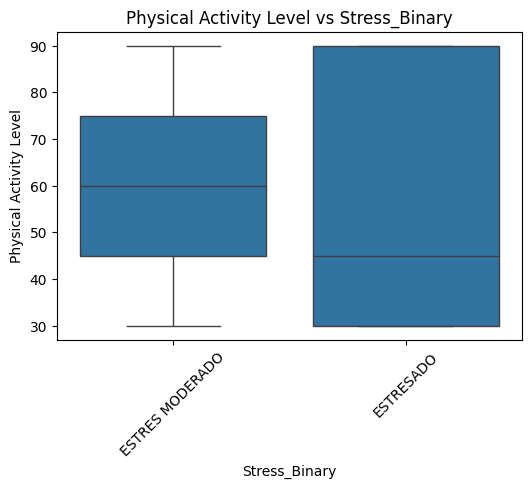

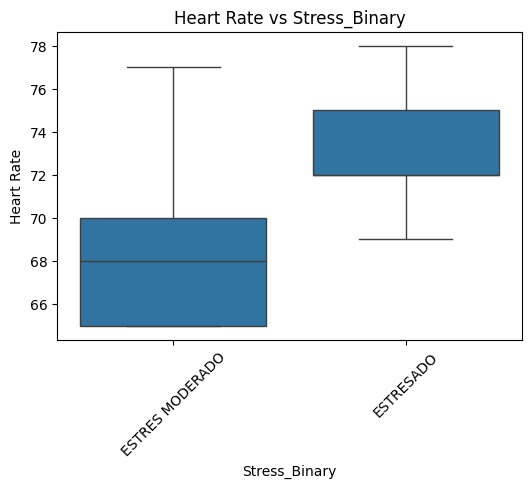

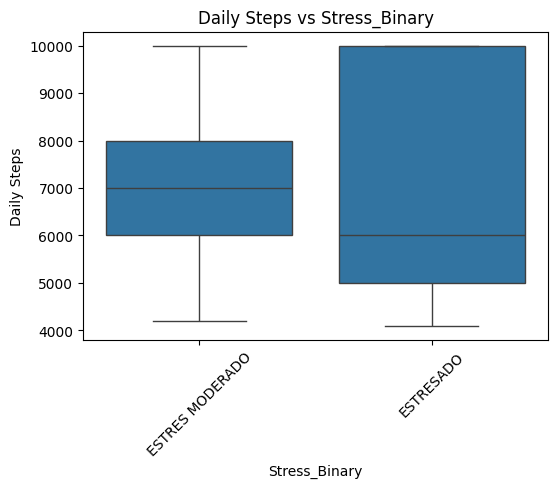

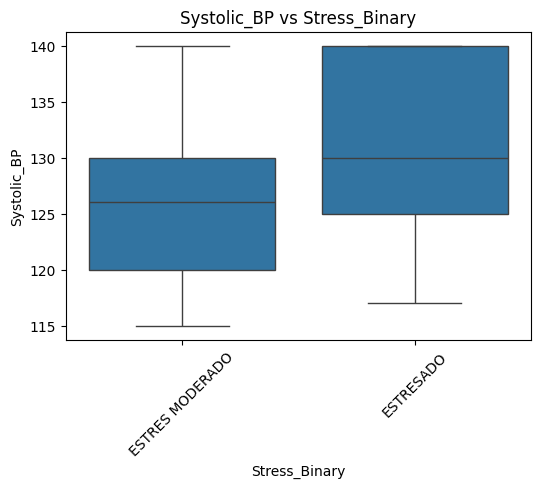

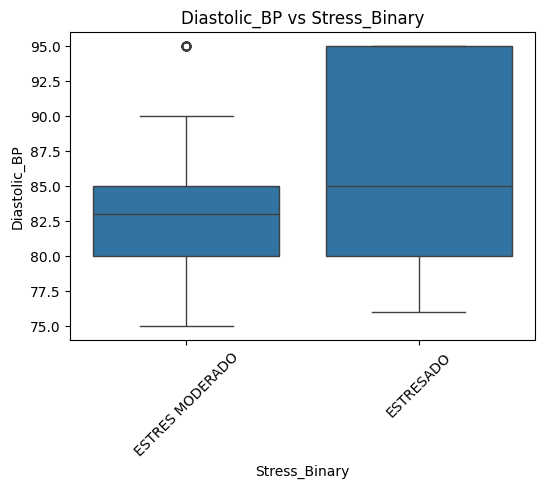

In [43]:
target = "Stress_Binary"
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.xticks(rotation=45)
        plt.show()


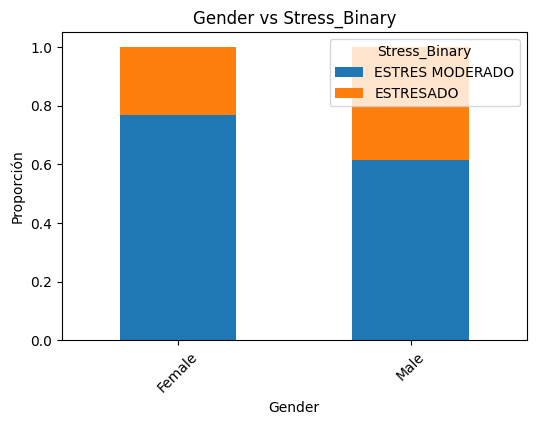

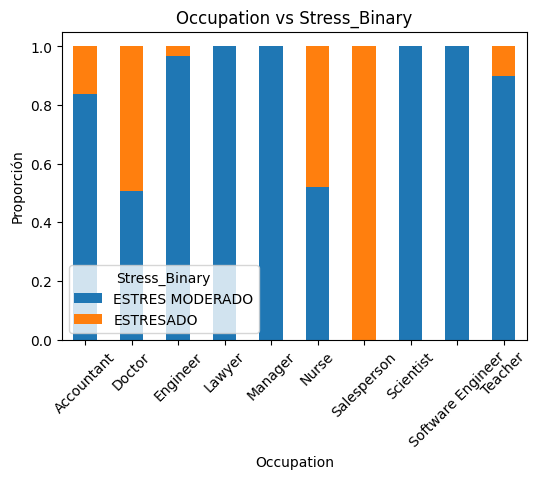

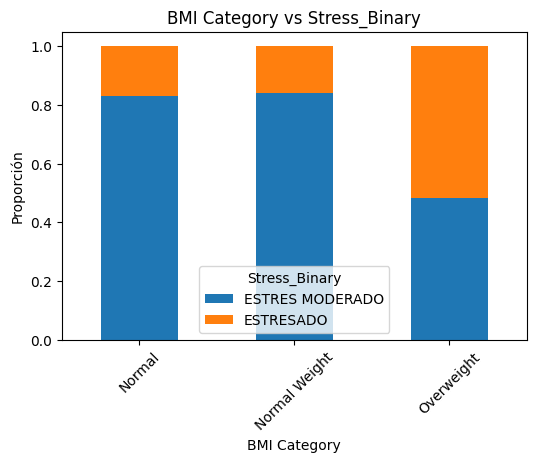

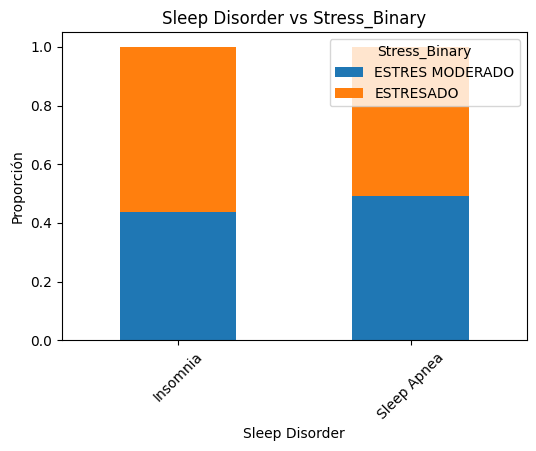

In [44]:
for col in cat_cols:
    if col in df.columns and col != target:
        prop = pd.crosstab(df[col], df[target], normalize='index')
        prop.plot(kind='bar', stacked=True, figsize=(6,4))
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel("Proporción")
        plt.xticks(rotation=45)
        plt.legend(title=target)
        plt.show()


### “Se observa que en el grupo ‘ESTRESADO’, la mediana de ‘Sleep Duration’ es menor que en ‘ESTRES MODERADO’, lo que sugiere que menos horas de sueño están asociadas a mayor estrés.”
“La categoría ‘High Physical Activity’ presenta menor proporción de individuos en el grupo ESTRESADO, lo que indica que una mayor actividad física se asocia a menor estrés.”

# Correlación entre variables numéricas


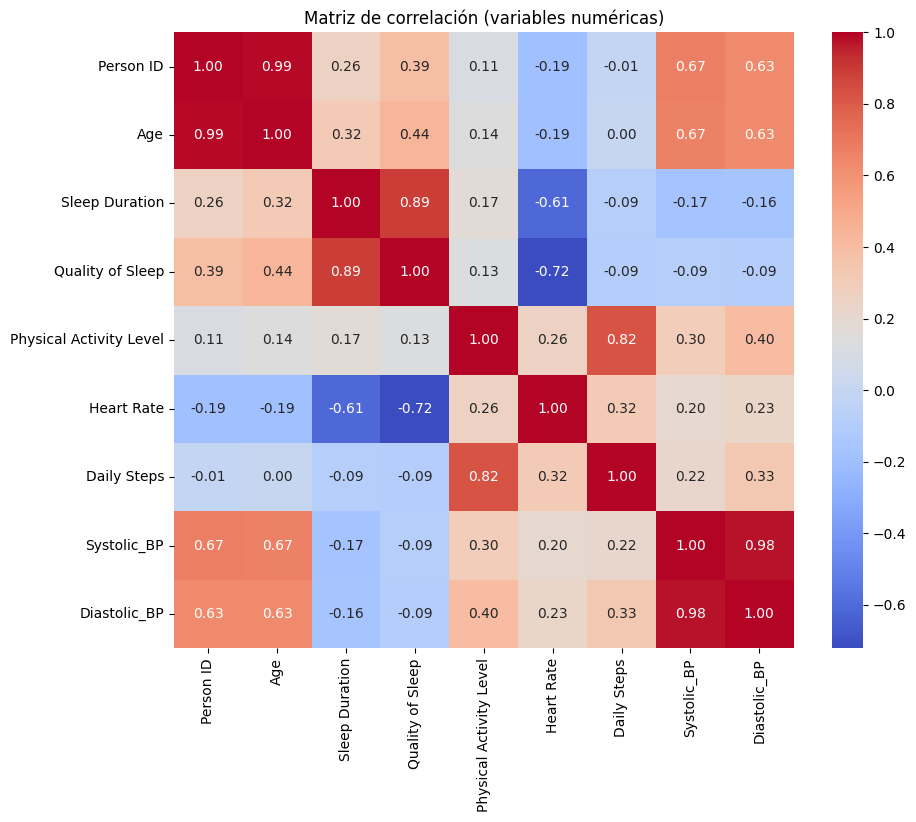

In [45]:
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()


### Veo que ‘Daily Steps’ y ‘Physical Activity Level’ tienen correlación de 0.85, lo que indica que ambas variables miden un concepto muy similar. Por tanto decido eliminar ‘Daily Steps’ para simplificar el modelo


In [46]:
cols_to_drop = []
# si decides eliminar:
cols_to_drop.append("Daily Steps")
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df.drop(columns=cols_to_drop, inplace=True)


### Elimino la variable seleccionada para reducir colinealidad y simplificar el conjunto de variables de entrada


# División en conjuntos de entrenamiento y prueba


In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("\nProporción clases en total:\n", y.value_counts(normalize=True))
print("\nProporción clases en train:\n", y_train.value_counts(normalize=True))
print("\nProporción clases en test:\n", y_test.value_counts(normalize=True))


Train: (287, 12) Test: (72, 12)

Proporción clases en total:
 Stress_Binary
ESTRES MODERADO    0.690808
ESTRESADO          0.309192
Name: proportion, dtype: float64

Proporción clases en train:
 Stress_Binary
ESTRES MODERADO    0.689895
ESTRESADO          0.310105
Name: proportion, dtype: float64

Proporción clases en test:
 Stress_Binary
ESTRES MODERADO    0.694444
ESTRESADO          0.305556
Name: proportion, dtype: float64


### Con stratify=y aseguro que la proporción de cada clase (‘ESTRES MODERADO’, ‘ESTRESADO’) se mantenga tanto en entrenamiento como en prueba, evitando sesgos.


In [48]:
train = X_train.copy()
train[target] = y_train
test = X_test.copy()
test[target] = y_test

train.to_csv("train_sleep_stress.csv", index=False)
test.to_csv("test_sleep_stress.csv", index=False)
print("Archivos generados.")


Archivos generados.


## Estos archivos serán la base para la modelación futura y se almacenan para compartir en el repositorio.


# Conclusiones

1. La mayoría de personas presenta niveles de estrés moderado a alto

El análisis mostró que una gran parte de los individuos está clasificada como “ESTRESADO” o “ESTRÉS MODERADO”, lo que indica que el estrés es un factor muy presente en la población del estudio y probablemente afecta sus hábitos diarios y su descanso.

2. Al comparar la duración del sueño con la variable objetivo:

Las personas etiquetadas como “ESTRESADO” duermen menos horas en promedio.

Esto sugiere que la falta de sueño puede ser un factor asociado al aumento del estrés.

3. Se observó que quienes reportan peor calidad de sueño tienen mayor proporción dentro del grupo “ESTRESADO”, lo que refuerza el vínculo entre descanso deficiente y tensión emocional.

4. Las gráficas mostraron que:

Los niveles bajos de actividad física se ven con mayor frecuencia en el grupo “ESTRESADO”.

Esto sugiere que estilos de vida sedentarios podrían estar relacionados con mayor carga de estrés.

5. La matriz de correlación indicó que ciertas variables numéricas medían prácticamente lo mismo (por ejemplo, Daily Steps y Physical Activity Level).
Para evitar redundancia y facilitar futuros modelos, fue apropiado eliminar una de ellas.

6. El filtrado de outliers hizo el dataset más estable

El uso del método IQR permitió eliminar valores extremos que podían distorsionar análisis y gráficas.
Después del filtrado, las distribuciones fueron más realistas y menos sesgadas.

7. La nueva variable objetivo permitió una visión más clara del estrés

Convertir el nivel de estrés a una categoría binaria ayudó a:

Simplificar el análisis,

Comparar grupos fácilmente,

Preparar el dataset para un futuro modelo de clasificación.

Esto hace el dataset más útil para Machine Learning.

8. La división estratificada 80/20 conservó el balance entre clases

Al separar en train y test manteniendo proporciones similares de ambas etiquetas, se asegura que cualquier modelo futuro será evaluado con datos representativos y no sesgados.